<a href="https://colab.research.google.com/github/gahz8212/python/blob/master/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%B6%84%EB%A5%983%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import seaborn as sns
titanic_df=pd.read_csv('/content/drive/MyDrive/csv/titanic_train.csv')
# titanic_df.info()

In [65]:
from sklearn.preprocessing import LabelEncoder
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  return df
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df
def transform_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  le=LabelEncoder()
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df
def preprocessing(df):
  df=fillna(df)
  df=drop_features(df)
  df=transform_features(df)

  return df




In [66]:
titanic_df=preprocessing(titanic_df)
# titanic_df.info()

/tmp/ipython-input-3736558878.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/tmp/ipython-input-3736558878.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

<Axes: xlabel='Pclass', ylabel='Survived'>

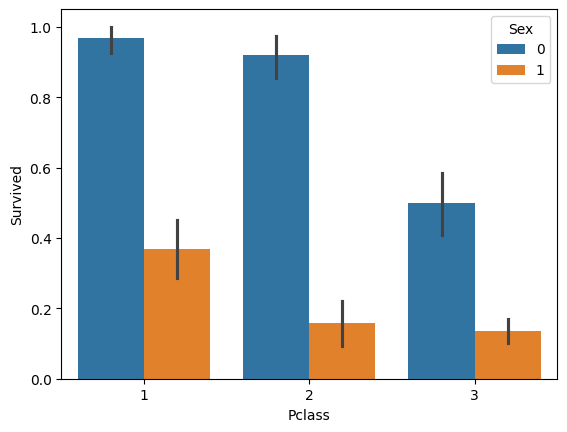

In [67]:
sns.barplot(x='Pclass',y='Survived',hue="Sex",data=titanic_df)

In [68]:
titanic_df.groupby(['Sex','Pclass'])['Survived'].count()

Sex  Pclass
0    1          94
     2          76
     3         144
1    1         122
     2         108
     3         347
Name: Survived, dtype: int64

In [69]:
titanic_df.head()
def make_category(age):
  cat=''
  if(age<=1):
    cat="Unknown"
  elif(age<=5):
    cat="Baby"
  elif(age<=12):
    cat="Child"
  elif(age<=25):
    cat="Student"
  elif(age<=40):
    cat="Young Adult"
  elif(age<=60):
    cat="Adult"
  else:
    cat="Elderly"
  return cat


In [70]:
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: make_category(x))
titanic_df['Age_cat']

,Age_cat
0,Student
1,Young Adult
2,Young Adult
3,Young Adult
4,Young Adult
...,...
886,Young Adult
887,Student
888,Young Adult
889,Young Adult


In [85]:
from numpy.random import RandomState
from sklearn.model_selection import train_test_split

titanic_df.info()
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop(['Survived','Age_cat'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
 9   Age_cat   891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
dt_clf=DecisionTreeClassifier(random_state=42)
rf_clf=RandomForestClassifier(random_state=42)
lr_clf=LogisticRegression(solver='liblinear')



In [88]:
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))

정확도:0.7709


In [91]:
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('정확도{0:.4f}'.format(accuracy_score(y_test,rf_clf_pred)))

정확도0.8045


In [92]:
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('정확도:{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

정확도:0.7933
